# Efficient Frontier

The following code calculates an Efficient Frontier for up to six assets. The user can choose which assets they would like to incorporate into their portfolio. Options include: S&P 500, Fixed Income, Gold, Private Credit, Real Estate, and Private Equity. The user can also select the time frame of the historical data used in the calculation.

In [119]:
import cvxpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
dropped_assets_string = input("Input the assets you would like to drop.\nMake sure to spell the assets correctly and separate each with a comma and a space.\nIf you do not want to drop any assets, simply press enter: ")

In [121]:
dropped_assets = dropped_assets_string.split(", ")
dropped_assets

['']

In [122]:
time_frame = input("Choose your desired time frame in years (1-10): ")

In [123]:
#Read in Data
asset_data = pd.read_csv("EF_Data_Summary.csv")
asset_data

,Month,S&P 500,Fixed Income,Gold,Private Credit,Real Estate,Private Equity
0,1/30/15,1994.99,1955.02,1283.79,933.11,317.41,1744.85
1,2/27/15,2104.50,1936.64,1213.18,987.22,308.89,1903.96
2,3/31/15,2067.89,1945.63,1183.57,979.69,310.75,1854.04
3,4/30/15,2085.51,1938.65,1184.37,989.70,295.33,1890.64
4,5/29/15,2107.39,1933.98,1190.58,989.64,293.95,1925.25
...,...,...,...,...,...,...,...
115,8/30/24,5648.40,2228.33,2503.39,1466.30,380.90,5001.46
116,9/30/24,5762.48,2258.17,2634.58,1468.34,391.07,5150.10
117,10/31/24,5705.45,2202.17,2743.97,1457.96,376.82,5038.92
118,11/29/24,6032.38,2225.45,2643.15,1504.10,391.66,5458.17


In [124]:
#drop rows of assets user does not want
if dropped_assets_string:
    asset_data = asset_data.drop(dropped_assets, axis=1)
asset_data

,Month,S&P 500,Fixed Income,Gold,Private Credit,Real Estate,Private Equity
0,1/30/15,1994.99,1955.02,1283.79,933.11,317.41,1744.85
1,2/27/15,2104.50,1936.64,1213.18,987.22,308.89,1903.96
2,3/31/15,2067.89,1945.63,1183.57,979.69,310.75,1854.04
3,4/30/15,2085.51,1938.65,1184.37,989.70,295.33,1890.64
4,5/29/15,2107.39,1933.98,1190.58,989.64,293.95,1925.25
...,...,...,...,...,...,...,...
115,8/30/24,5648.40,2228.33,2503.39,1466.30,380.90,5001.46
116,9/30/24,5762.48,2258.17,2634.58,1468.34,391.07,5150.10
117,10/31/24,5705.45,2202.17,2743.97,1457.96,376.82,5038.92
118,11/29/24,6032.38,2225.45,2643.15,1504.10,391.66,5458.17


In [125]:
#Create variable used to filter to desired time frame
included_rows = int(time_frame)*12
included_rows

ValueError: invalid literal for int() with base 10: ''

In [ ]:
#Filter to the desired time frame
asset_data = asset_data.tail(included_rows)
asset_data

,Month,S&P 500,Fixed Income,Gold,Private Credit,Real Estate,Private Equity
96,1/31/23,4076.60,2111.76,1928.36,1257.76,360.20,3809.37
97,2/28/23,3970.15,2057.16,1826.92,1259.23,338.10,3536.41
98,3/31/23,4109.31,2109.41,1969.28,1205.32,329.70,3458.49
99,4/28/23,4169.48,2122.20,1990.00,1207.92,332.15,3593.53
100,5/31/23,4179.83,2099.09,1962.73,1188.17,318.38,3226.24
101,6/30/23,4450.38,2091.60,1919.35,1248.68,334.21,3535.24
102,7/31/23,4588.96,2090.15,1965.09,1321.28,339.81,3724.68
103,8/31/23,4507.66,2076.80,1940.19,1312.17,328.75,3620.38
104,9/29/23,4288.05,2024.02,1848.63,1317.01,302.72,3275.16
105,10/31/23,4193.80,1992.08,1983.88,1251.11,291.38,3126.96


In [ ]:
#Convert users' selected assets into a list for later use
selected_assets = asset_data.columns.tolist()
#take out Month
selected_assets = [col for col in selected_assets if col != 'Month']
# add "Weight" for later use
selected_assets = [col + ' Weight' for col in selected_assets]
selected_assets

['S&P 500 Weight',
 'Fixed Income Weight',
 'Gold Weight',
 'Private Credit Weight',
 'Real Estate Weight',
 'Private Equity Weight']

In [ ]:
#Add "monthly return" to all columns besides Month
asset_data.columns = [col + " Monthly Return" if col != "Month" else col for col in asset_data.columns]

# Make every value a pct change except for the 'Month' column
asset_data.loc[:, asset_data.columns != "Month"] = asset_data.loc[:, asset_data.columns != "Month"].pct_change()
asset_data

,Month,S&P 500 Monthly Return,Fixed Income Monthly Return,Gold Monthly Return,Private Credit Monthly Return,Real Estate Monthly Return,Private Equity Monthly Return
96,1/31/23,NaN,NaN,NaN,NaN,NaN,NaN
97,2/28/23,-0.026112,-0.025855,-0.052604,0.001169,-0.061355,-0.071655
98,3/31/23,0.035052,0.025399,0.077923,-0.042812,-0.024845,-0.022034
99,4/28/23,0.014642,0.006063,0.010522,0.002157,0.007431,0.039046
100,5/31/23,0.002482,-0.010890,-0.013704,-0.016350,-0.041457,-0.102209
101,6/30/23,0.064728,-0.003568,-0.022102,0.050927,0.049720,0.095777
102,7/31/23,0.031139,-0.000693,0.023831,0.058141,0.016756,0.053586
103,8/31/23,-0.017716,-0.006387,-0.012671,-0.006895,-0.032548,-0.028002
104,9/29/23,-0.048719,-0.025414,-0.047191,0.003689,-0.079179,-0.095355
105,10/31/23,-0.021980,-0.015780,0.073162,-0.050038,-0.037460,-0.045250


In [ ]:
#Remove unwanted data and drop first row
asset_data_returns = asset_data.loc[:, asset_data.columns.str.contains("Return")]
asset_data_returns = asset_data_returns.dropna()
asset_data_returns                                                         

,S&P 500 Monthly Return,Fixed Income Monthly Return,Gold Monthly Return,Private Credit Monthly Return,Real Estate Monthly Return,Private Equity Monthly Return
97,-0.026112,-0.025855,-0.052604,0.001169,-0.061355,-0.071655
98,0.035052,0.025399,0.077923,-0.042812,-0.024845,-0.022034
99,0.014642,0.006063,0.010522,0.002157,0.007431,0.039046
100,0.002482,-0.010890,-0.013704,-0.016350,-0.041457,-0.102209
101,0.064728,-0.003568,-0.022102,0.050927,0.049720,0.095777
102,0.031139,-0.000693,0.023831,0.058141,0.016756,0.053586
103,-0.017716,-0.006387,-0.012671,-0.006895,-0.032548,-0.028002
104,-0.048719,-0.025414,-0.047191,0.003689,-0.079179,-0.095355
105,-0.021980,-0.015780,0.073162,-0.050038,-0.037460,-0.045250
106,0.089179,0.045284,0.026478,0.061833,0.121079,0.168873


In [ ]:
#Calculate Avg Monthly Returns and Annualize it
expected_returns = asset_data_returns.mean()
expected_returns = (1 + expected_returns)**12 - 1
expected_returns

S&P 500 Monthly Return           0.219434
Fixed Income Monthly Return      0.021328
Gold Monthly Return              0.184177
Private Credit Monthly Return    0.094038
Real Estate Monthly Return       0.014113
Private Equity Monthly Return    0.200851
dtype: float64

In [ ]:
#Calculate Covariance Matrix and Annualize it
cov_matrix = asset_data_returns.cov() * 12
cov_matrix

,S&P 500 Monthly Return,Fixed Income Monthly Return,Gold Monthly Return,Private Credit Monthly Return,Real Estate Monthly Return,Private Equity Monthly Return
S&P 500 Monthly Return,0.015367,0.006523,0.002365,0.007156,0.020678,0.027434
Fixed Income Monthly Return,0.006523,0.004962,0.003439,0.002668,0.011592,0.011659
Gold Monthly Return,0.002365,0.003439,0.017782,-0.003315,0.005981,0.004373
Private Credit Monthly Return,0.007156,0.002668,-0.003315,0.009768,0.011422,0.016202
Real Estate Monthly Return,0.020678,0.011592,0.005981,0.011422,0.038736,0.040423
Private Equity Monthly Return,0.027434,0.011659,0.004373,0.016202,0.040423,0.058135


In [ ]:
#Primary Calculations
n = len(cov_matrix)
weights = cp.Variable(n)
weights

Variable((6,), var2056)

In [ ]:
#Calculate Target Returns
target_returns = np.linspace(
expected_returns.min(),
expected_returns.max(),
10 # Number of points on the frontier
)
target_returns

array([0.01411325, 0.03692665, 0.05974005, 0.08255345, 0.10536685,
       0.12818025, 0.15099365, 0.17380705, 0.19662045, 0.21943385])

In [ ]:
# Store results
efficient_portfolios = []
for target_return in target_returns:
    # Objective: Minimize portfolio variance
    portfolio_variance = cp.quad_form(weights, cov_matrix)
    objective = cp.Minimize(portfolio_variance)
    # Constraints
    constraints = [
        weights >= 0, # No short-selling
        cp.sum(weights) == 1, # Fully invested
        expected_returns.values @ weights >= target_return # Target return
        ]
    # Solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()
    if prob.status == 'optimal':
        annualized_return = expected_returns.values @ weights.value
        annualized_variance = portfolio_variance.value
        efficient_portfolios.append({
            'Weights': weights.value,
            'Return': annualized_return,
            'Variance': annualized_variance
            })

In [ ]:
# Convert to DataFrame
efficient_frontier = pd.DataFrame(efficient_portfolios)
efficient_frontier['Standard Deviation'] = np.sqrt(efficient_frontier['Variance'])
# Remove duplicates (if any)
efficient_frontier = efficient_frontier.drop_duplicates(['Return', 'Variance'])
efficient_frontier

,Weights,Return,Variance,Standard Deviation
0,"[-3.664650550999764e-21, 0.4756431782389038, 0...",0.076579,0.003905,0.062494
3,"[-4.760739070873406e-23, 0.4247810486989505, 0...",0.082553,0.003916,0.062578
4,"[-3.1835411431896512e-22, 0.23056391261512327,...",0.105367,0.004149,0.064416
5,"[0.05200407759323259, 0.07919024588103593, 0.3...",0.128180,0.004643,0.068137
6,"[0.1710025261341885, -2.77257121239834e-23, 0....",0.150994,0.005305,0.072835
7,"[0.35534091424146164, -9.312670281460885e-24, ...",0.173807,0.006575,0.081084
8,"[0.5396793023487347, 1.1914141325204636e-24, 0...",0.196620,0.008560,0.092521
9,"[0.9999999999999972, -3.6762020520271774e-22, ...",0.219434,0.015367,0.123962


In [ ]:
# Split the 'Weights' into independent columns
efficient_frontier[selected_assets] = pd.DataFrame(efficient_frontier['Weights'].tolist(), index=efficient_frontier.index)

# Convert weights to percentages
efficient_frontier = efficient_frontier * 100

# Add '%' to the asset column names
efficient_frontier.columns = [f"{col} (%)" if 'Weight' in col else col for col in efficient_frontier.columns]

# Round the values to 2 decimal places
efficient_frontier = efficient_frontier.round(2)

# Change the index to 'Portfolio X' format
efficient_frontier.index = [f"Portfolio {i+1}" for i in range(len(efficient_frontier))]

# Rename columns
efficient_frontier = efficient_frontier.rename(columns={'Return': 'Expected Return (%)', 
                                                       'Variance': 'Variance (%)', 
                                                       'Standard Deviation': 'Standard Deviation (%)'})
#Drop Weights columns
efficient_frontier = efficient_frontier.drop("Weights (%)", axis=1)

#Drop Var Column
efficient_frontier = efficient_frontier.drop("Variance (%)", axis=1)
efficient_frontier

,Expected Return (%),Standard Deviation (%),S&P 500 Weight (%),Fixed Income Weight (%),Gold Weight (%),Private Credit Weight (%),Real Estate Weight (%),Private Equity Weight (%)
Portfolio 1,7.66,6.25,-0.00,47.56,19.00,33.44,-0.0,-0.0
Portfolio 2,8.26,6.26,-0.00,42.48,21.52,36.00,0.0,-0.0
Portfolio 3,10.54,6.44,-0.00,23.06,31.17,45.78,0.0,-0.0
Portfolio 4,12.82,6.81,5.20,7.92,37.03,49.85,0.0,0.0
Portfolio 5,15.10,7.28,17.10,-0.00,39.40,43.50,0.0,0.0
Portfolio 6,17.38,8.11,35.53,-0.00,39.06,25.40,0.0,0.0
Portfolio 7,19.66,9.25,53.97,0.00,38.73,7.30,-0.0,-0.0
Portfolio 8,21.94,12.40,100.00,-0.00,0.00,-0.00,-0.0,0.0


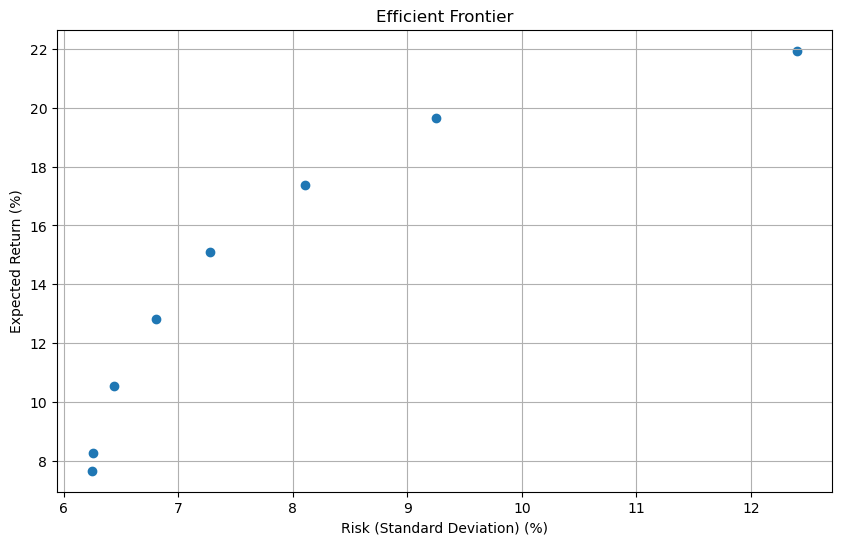

In [ ]:
#Graph
plt.figure(figsize=(10, 6))
plt.scatter(
    efficient_frontier['Standard Deviation (%)'],
    efficient_frontier['Expected Return (%)'],
    marker='o'
)
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation) (%)')
plt.ylabel('Expected Return (%)')
plt.grid(True)
plt.show()